In [23]:
!python -m pip install --upgrade pip
!pip install imblearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

In [10]:
train=pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Health%20Insurance%20Cross%20Sell%20Prediction%20%F0%9F%8F%A0%20%F0%9F%8F%A5/train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Health%20Insurance%20Cross%20Sell%20Prediction%20%F0%9F%8F%A0%20%F0%9F%8F%A5/test.csv')

In [ ]:
test.head()

       id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  381110   Male   25                1         11.0                   1   
1  381111   Male   40                1         28.0                   0   
2  381112   Male   47                1         28.0                   0   
3  381113   Male   24                1         27.0                   1   
4  381114   Male   27                1         28.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    < 1 Year             No         35786.0                 152.0       53  
1    1-2 Year            Yes         33762.0                   7.0      111  
2    1-2 Year            Yes         40050.0                 124.0      199  
3    < 1 Year            Yes         37356.0                 152.0      187  
4    < 1 Year             No         59097.0                 152.0      297  

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [ ]:
train.head()

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0  

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
train.shape

(381109, 12)

In [ ]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']
train[numerical_columns].describe()

                 Age    Region_Code  Annual_Premium        Vintage
count  381109.000000  381109.000000   381109.000000  381109.000000
mean       38.822584      26.388807    30564.389581     154.347397
std        15.511611      13.229888    17213.155057      83.671304
min        20.000000       0.000000     2630.000000      10.000000
25%        25.000000      15.000000    24405.000000      82.000000
50%        36.000000      28.000000    31669.000000     154.000000
75%        49.000000      35.000000    39400.000000     227.000000
max        85.000000      52.000000   540165.000000     299.000000

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [ ]:
train

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning




<Figure size 432x288 with 1 Axes>

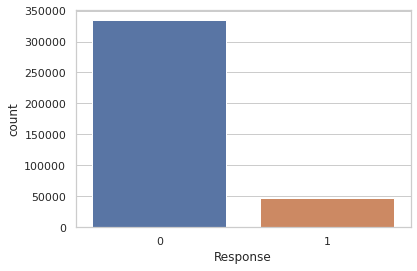

In [ ]:
sns.countplot(train.Response)

In [ ]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<Figure size 360x360 with 1 Axes>

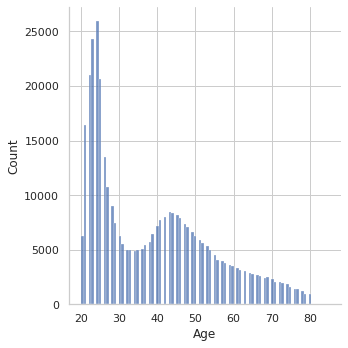

In [ ]:
sns.displot(train.Age)

<Figure size 432x288 with 1 Axes>

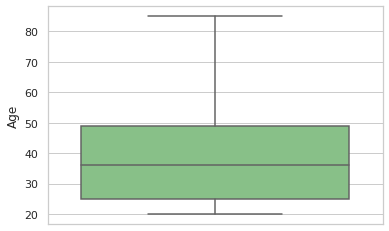

In [ ]:
sns.boxplot(y = 'Age', data = train,palette='Accent')

<Figure size 432x288 with 1 Axes>

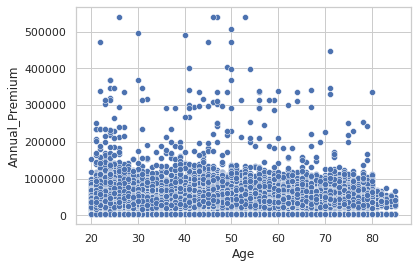

In [ ]:
sns.scatterplot(x=train['Age'],y=train['Annual_Premium'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning




<Figure size 432x288 with 1 Axes>

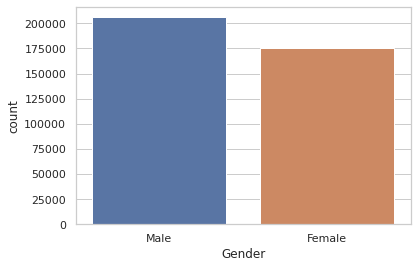

In [ ]:
sns.countplot(train.Gender)

In [ ]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

<Figure size 403.2x288 with 2 Axes>

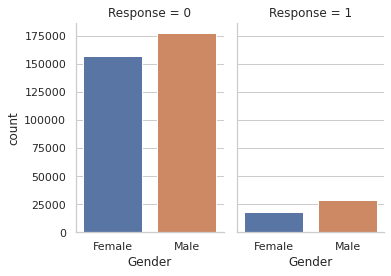

In [ ]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

In [ ]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

   Gender  Driving_License
0  Female           175020
1    Male           206089

,Gender,Driving_License
0,Female,175020
1,Male,206089


<Figure size 360x360 with 1 Axes>

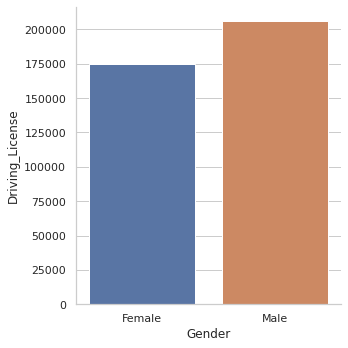

In [ ]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning




<Figure size 432x288 with 1 Axes>

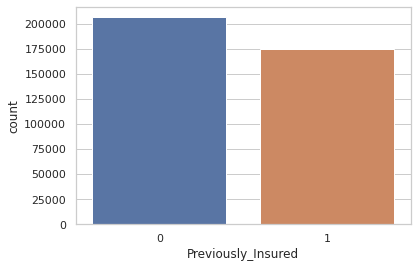

In [ ]:
sns.countplot(train.Previously_Insured)

In [ ]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

  Vehicle_Age  Response   count
0    1-2 Year         0  165510
1    1-2 Year         1   34806
2    < 1 Year         0  157584
3    < 1 Year         1    7202
4   > 2 Years         0   11305
5   > 2 Years         1    4702

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


<Figure size 403.2x288 with 2 Axes>

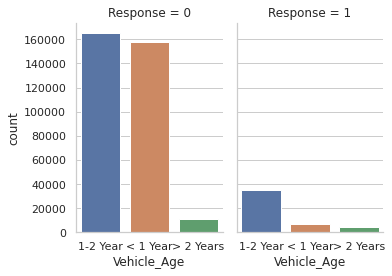

In [ ]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning




<Figure size 432x288 with 1 Axes>

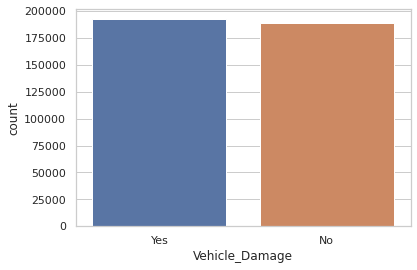

In [ ]:
sns.countplot(train.Vehicle_Damage)

<Figure size 403.2x288 with 2 Axes>

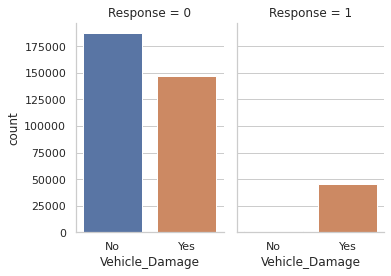

In [ ]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)




<Figure size 432x288 with 1 Axes>

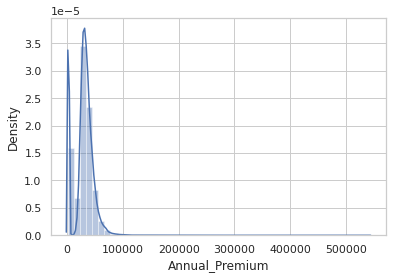

In [ ]:
sns.distplot(train.Annual_Premium)

<Figure size 432x288 with 1 Axes>

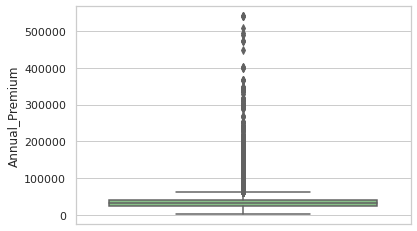

In [ ]:
sns.boxplot(y = 'Annual_Premium', data = train,palette='Accent')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)




<Figure size 432x288 with 1 Axes>

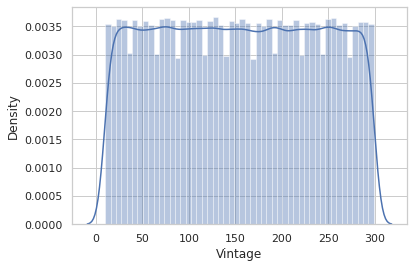

In [ ]:
sns.distplot(train.Vintage)

In [ ]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
train=pd.get_dummies(train,drop_first=True)
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])


mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])
train=train.drop('id',axis=1)
for column in cat_feat:
    train[column] = train[column].astype('str')
train

       Gender       Age Driving_License Region_Code Previously_Insured  \
0           1  0.333777               1        28.0                  0   
1           1  2.396751               1         3.0                  0   
2           1  0.527181               1        28.0                  0   
3           1 -1.148985               1        11.0                  1   
4           0 -0.633242               1        41.0                  1   
...       ...       ...             ...         ...                ...   
381104      1  2.267815               1        26.0                  1   
381105      1 -0.568774               1        37.0                  1   
381106      1 -1.148985               1        30.0                  1   
381107      0  1.881007               1        14.0                  0   
381108      1  0.462713               1        29.0                  0   

        Annual_Premium Policy_Sales_Channel   Vintage  Response  \
0             0.070366                 26.0 

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,2.267815,1,26.0,1,0.051234,26.0,-0.792954,0,0,0,0
381105,1,-0.568774,1,37.0,1,0.069551,152.0,-0.279037,0,1,0,0
381106,1,-1.148985,1,30.0,1,0.060439,160.0,0.079509,0,1,0,0
381107,0,1.881007,1,14.0,0,0.078110,124.0,-0.960275,0,0,1,1


In [ ]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test['Vehicle_Age_lt_1_Year']=test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years']=test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes']=test['Vehicle_Damage_Yes'].astype('int')
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
test[num_feat] = ss.fit_transform(test[num_feat])


mm = MinMaxScaler()
test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])
for column in cat_feat:
    test[column] = test[column].astype('str')
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)
id=test.id
test=test.drop('id',axis=1)
x_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [22]:
!python -m pip install --upgrade pip
!pip install catboost
!pip install lightgbm
!pip install hyperopt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

     |████████████████████████████████| 2.0 MB 47.0 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1


In [12]:
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))
filename = 'rf_model.sav'
rf_load = pickle.load(open(filename, 'rb'))

In [17]:
random_state=42
n_iter=50
num_folds=2
kf = KFold(n_splits=num_folds, random_state=random_state,shuffle=True)

In [20]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265
